In [1]:
!pip install opencv-python
import cv2
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Putting the training and testing data 

##### Remember,the training and test element X_test,Xtrain,y_train,y_testing should be seprated by () as the data only fit only on 2 

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data('train_n.csv')

In [3]:
print(X_train[0])
print(X_train.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print(X_test[0])
X_test.shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

(10000, 28, 28)

In [5]:
print(y_train.shape)
y_test.shape

(60000,)


(10000,)

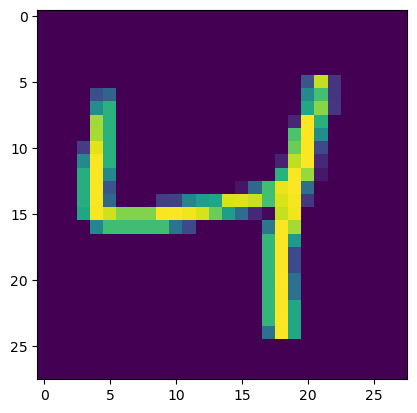

In [6]:
plt.imshow(X_train[2])

### It can be clearly seen that is show training element at 2 is 4 

### Normalize the training and testing set

In [7]:
X_train=tf.keras.utils.normalize(X_train,axis=0)
X_test=tf.keras.utils.normalize(X_test,axis=0)

In [8]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
m=model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8057 - accuracy: 0.8049
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3441 - accuracy: 0.9037
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2900 - accuracy: 0.9170
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2610 - accuracy: 0.9247
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2385 - accuracy: 0.9307
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2181 - accuracy: 0.9369
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2008 - accuracy: 0.9424
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1849 - accuracy: 0.9464
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1707 - accuracy: 0.9509
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.15

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Predicting the values

In [11]:
y_predict1=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [12]:
y_predict = y_predict1.argmax(axis=1)
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## loss and accuracy 

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9554

In [14]:
loss = model.evaluate(X_test,y_test)
print(loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9554
[0.2074025571346283, 0.9553999900817871]


In [15]:
accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9554
[0.2074025571346283, 0.9553999900817871]


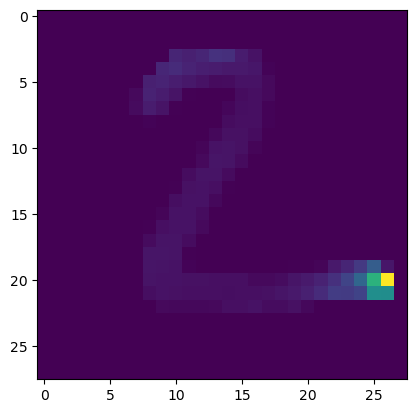

In [16]:
plt.imshow(X_test[1])

In [17]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 39ms/step


array([2], dtype=int64)